AttributeError: 'Colorbar' object has no attribute 'set_clim'

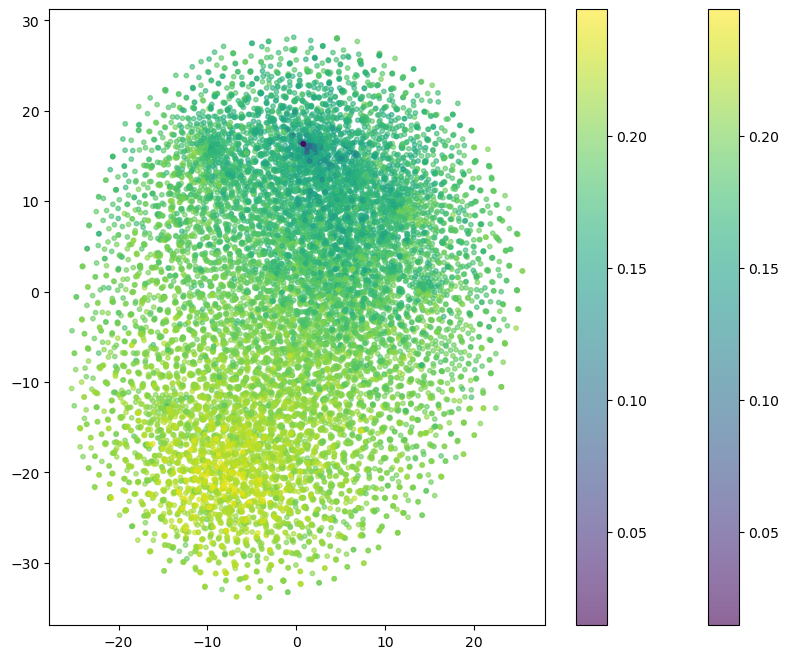

In [14]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 文件夹路径
folder_path = r'E:\picture_diffusion_vae1\Latent_space1'
# 保存可视化结果的路径
save_path = r'E:\picture_diffusion_vae1\tsne_visualization.jpg'
# Excel 文件路径
excel_path = r'E:\pic_diffusion_vae\filtered_data_output.xlsx'

# 读取 Excel 文件，获取图片编号和对应的标签
data = pd.read_excel(excel_path)
image_indices = data.iloc[:, 0].tolist()  # 第一列为图片编号
labels = data.iloc[:, 4].tolist()  # 第二列为标签

# 初始化空列表存储图片数据
latent_space = []
filtered_labels = []

# 读取图片并转换为numpy数组，同时获取对应的标签
for i, label in zip(image_indices, labels):
    img_path = os.path.join(folder_path, f'lcy{i}.jpg')
    if os.path.exists(img_path):
        img = Image.open(img_path).convert('L')  # 转换为灰度图像
        img_array = np.array(img).flatten()  # 展平为一维数组
        latent_space.append(img_array)
        filtered_labels.append(label)

# 转换为numpy数组
latent_space = np.array(latent_space)
filtered_labels = np.array(filtered_labels)

# 使用t-SNE进行降维，调整参数
tsne = TSNE(
    n_components=2,
    random_state=0,
    perplexity=20,
    learning_rate=200,
    n_iter=1000,
    early_exaggeration=12,
    metric='euclidean',
    init='pca',
    method='barnes_hut',
    angle=0.5
)
latent_space_2d = tsne.fit_transform(latent_space)

# 可视化降维结果，并按类别标记
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_space_2d[:, 0], latent_space_2d[:, 1], c=filtered_labels, cmap='viridis', alpha=0.6, s=10)
plt.colorbar(scatter)

plt.title("t-SNE Visualization of VAE Latent Space")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.savefig(save_path)
plt.show()


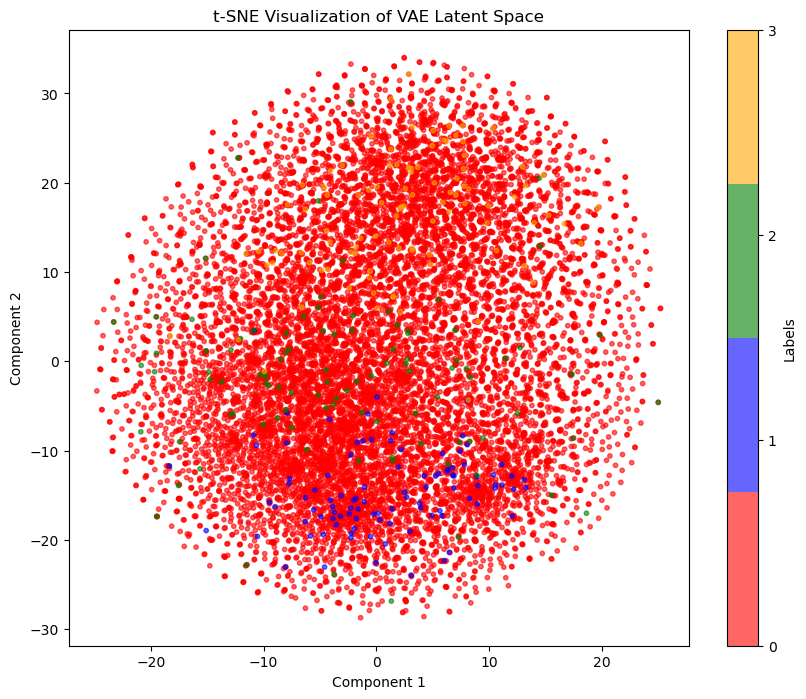

In [8]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 文件夹路径
folder_path = r'E:\picture_diffusion_vae1\Latent_space1'
# 保存可视化结果的路径
save_path = r'E:\picture_diffusion_vae1\tSNE_visualization.jpg'
# 保存降维结果的Excel路径
output_excel_path = r'E:\picture_diffusion_vae1\tSNE_result.xlsx'
# Excel 文件路径
excel_path = r'E:\picture_diffusion_vae1\T-SNE.xlsx'

# 读取 Excel 文件，获取图片编号和对应的标签
data = pd.read_excel(excel_path)
image_indices = data.iloc[:, 0].tolist()  # 第一列为图片编号
labels = data.iloc[:, 1].tolist()  # 第二列为标签

# 初始化空列表存储图片数据
latent_space = []
filtered_labels = []

# 读取图片并转换为numpy数组，同时获取对应的标签
for i, label in zip(image_indices, labels):
    img_path = os.path.join(folder_path, f'lcy{i}.jpg')
    if os.path.exists(img_path):
        img = Image.open(img_path).convert('L')  # 转换为灰度图像
        img_array = np.array(img).flatten()  # 展平为一维数组
        latent_space.append(img_array)
        filtered_labels.append(label)

# 转换为numpy数组
latent_space = np.array(latent_space)
filtered_labels = np.array(filtered_labels)

# 使用t-SNE进行降维，调整参数
tsne = TSNE(
    n_components=2,
    random_state=0,
    perplexity=20,
    learning_rate=200,
    n_iter=1000,
    early_exaggeration=12,
    metric='euclidean',
    init='pca',
    method='barnes_hut',
    angle=0.5
)
latent_space_2d = tsne.fit_transform(latent_space)

# 将降维后的坐标和标签保存到DataFrame
output_df = pd.DataFrame({
    'X': latent_space_2d[:, 0],
    'Y': latent_space_2d[:, 1],
    'Label': filtered_labels
})

# 保存DataFrame到Excel
output_df.to_excel(output_excel_path, index=False)

# 自定义颜色映射
colors = ['red', 'blue', 'green', 'orange']
cmap = ListedColormap(colors)

# 可视化降维结果，并按类别标记
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_space_2d[:, 0], latent_space_2d[:, 1], c=filtered_labels, cmap=cmap, alpha=0.6, s=10)
cbar = plt.colorbar(scatter, ticks=[0, 1, 2, 3])
cbar.set_label('Labels')
cbar.set_ticklabels(['0', '1', '2', '3'])
plt.title("t-SNE Visualization of VAE Latent Space")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.savefig(save_path)
plt.show()


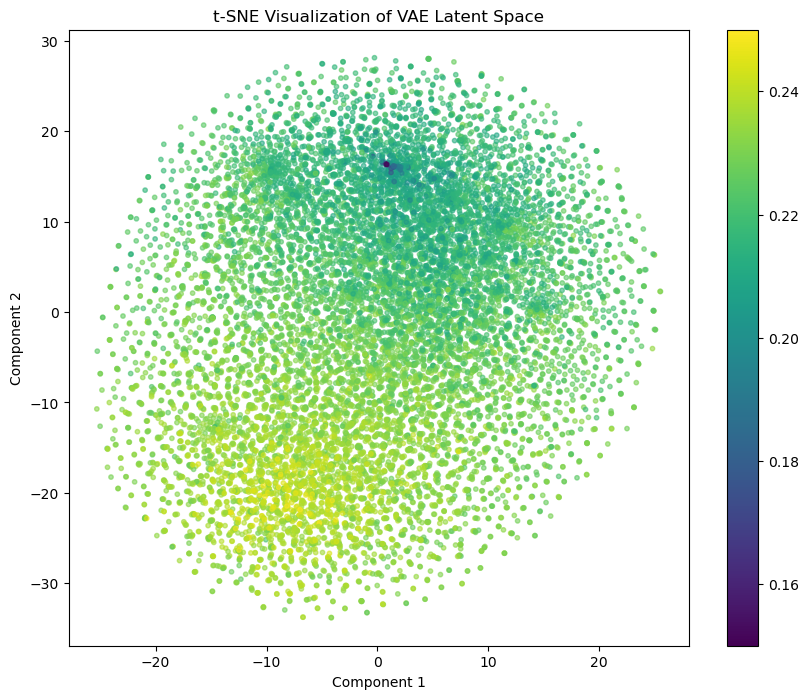

In [16]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# 文件夹路径
folder_path = r'E:\picture_diffusion_vae1\Latent_space1'
# 保存可视化结果的路径
save_path = r'E:\picture_diffusion_vae1\tsne_visualization.jpg'
# Excel 文件路径
excel_path = r'E:\pic_diffusion_vae\filtered_data_output.xlsx'

# 读取 Excel 文件，获取图片编号和对应的标签
data = pd.read_excel(excel_path)
image_indices = data.iloc[:, 0].tolist()  # 第一列为图片编号
labels = data.iloc[:, 4].tolist()  # 第二列为标签

# 初始化空列表存储图片数据
latent_space = []
filtered_labels = []

# 读取图片并转换为numpy数组，同时获取对应的标签
for i, label in zip(image_indices, labels):
    img_path = os.path.join(folder_path, f'lcy{i}.jpg')
    if os.path.exists(img_path):
        img = Image.open(img_path).convert('L')  # 转换为灰度图像
        img_array = np.array(img).flatten()  # 展平为一维数组
        latent_space.append(img_array)
        filtered_labels.append(label)

# 转换为numpy数组
latent_space = np.array(latent_space)
filtered_labels = np.array(filtered_labels)

# 使用t-SNE进行降维，调整参数
tsne = TSNE(
    n_components=2,
    random_state=0,
    perplexity=20,
    learning_rate=200,
    n_iter=1000,
    early_exaggeration=12,
    metric='euclidean',
    init='pca',
    method='barnes_hut',
    angle=0.5
)
latent_space_2d = tsne.fit_transform(latent_space)

# 可视化降维结果，并按类别标记
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_space_2d[:, 0], latent_space_2d[:, 1], c=filtered_labels, cmap='viridis', alpha=0.6, s=10)

# 创建并设置color bar的范围
norm = Normalize(vmin=0.15, vmax=0.25)
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)

plt.title("t-SNE Visualization of VAE Latent Space")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.savefig(save_path)
plt.show()
